# BITCOIN PRICE PREDICTION

## Problem Statement -
* Predicting the price of Cryptocurrency for next several days on the basis of previous 'Close' prices with the help of Statistical tools, machine learning and deep learning algorithms. 

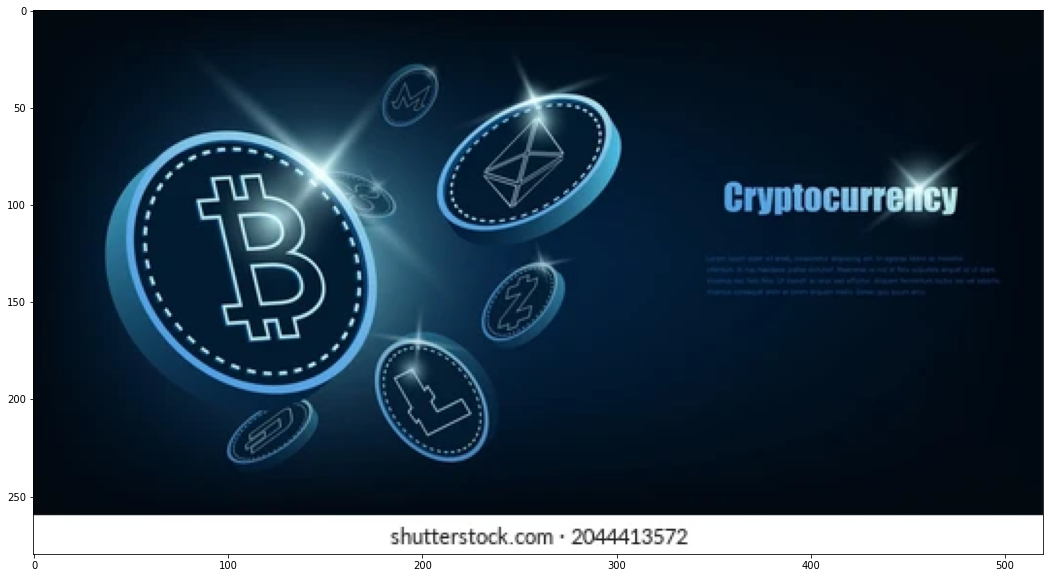

In [ ]:
import cv2
import matplotlib.pyplot as plt
 
plt.figure(figsize=(50,10))
img = cv2.imread('/content/crypto-currencycrypto-currency-coin.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

# Data Gathering

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 6.4 MB/s 
     |████████████████████████████████| 62 kB 864 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.5 MB/s 
     |████████████████████████████████| 9.8 MB 44.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.express as px


# For ARIMA model
from datetime import datetime
import pmdarima as pm
from sklearn.metrics import mean_squared_error


# for LSTM model 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
# Give the symbol any cryptocurrency of which you want to predict the price 
'''For Bitcoin = BTC-USD
  For Etherium = ETH-USD
  For Tether = USDT-USD
  For USD Coin = USDC-USD
  For Binance Coin = BNB-USD'''

currency = input('Enter the symbol of currency =')
# currency = yf.Ticker(currency)
df = yf.download(currency)

Enter the symbol of currency =BTC-USD
[*********************100%***********************]  1 of 1 completed


In [ ]:
# gives first 5 rows
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,2.05314,2.17423,1.89394,1.99077,1.99077,19192200
2017-11-10,2.00773,2.06947,1.64478,1.79684,1.79684,11155000
2017-11-11,1.78628,1.91775,1.61429,1.67047,1.67047,8178150
2017-11-12,1.66889,1.67280,1.46256,1.51969,1.51969,15298700
2017-11-13,1.52601,1.73502,1.51760,1.68662,1.68662,12238800


In [ ]:
# gives the statistical view of every individual column
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1.722000e+03
mean,134.119329,138.873248,128.853196,134.230644,134.230644,9.607025e+08
std,185.936133,192.234471,178.771366,185.847003,185.847003,1.488530e+09
min,1.511360,1.582660,1.462560,1.510360,1.510360,9.284000e+03
25%,13.635150,14.001996,13.115260,13.636638,13.636638,1.162180e+08
50%,22.165316,22.834749,21.368334,22.179639,22.179639,3.056065e+08
75%,287.391754,298.641434,265.689644,287.434860,287.434860,1.450866e+09
max,676.315918,690.931946,634.549500,675.684082,675.684082,1.798295e+10


In [ ]:
d =df.drop(['Adj Close','Volume'],axis=1)

In [ ]:
d.to_csv(r"/content/Bitcoin.csv")

In [ ]:
df = pd.read_csv("/content/Bitcoin.csv")
df

,Date,Open,High,Low,Close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...,...
2866,2022-07-23,22706.984375,22977.210938,22002.910156,22465.478516
2867,2022-07-24,22465.509766,22974.001953,22306.839844,22609.164062
2868,2022-07-25,22607.156250,22649.121094,21361.642578,21361.701172
2869,2022-07-26,21361.121094,21361.121094,20776.816406,21239.753906


In [ ]:
df["Date"]= pd.to_datetime(df["Date"])

In [ ]:
print("Rows: ",df.shape[0])
print("Columns: ",df.shape[1])
print("\nFeatures: \n",df.columns.tolist())
print("\nMissing Values: \n",df.isnull().sum())

Rows:  2871
Columns:  5

Features: 
 ['Date', 'Open', 'High', 'Low', 'Close']

Missing Values: 
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


In [ ]:
# gives the statistical description of each column

df.describe()

,Open,High,Low,Close
count,2865.000000,2865.000000,2865.000000,2865.000000
mean,12478.403928,12803.357420,12114.235243,12484.626038
std,16554.459837,16982.173382,16058.496852,16550.385430
min,176.897003,211.731003,171.509995,178.102997
25%,639.083008,642.898010,628.283997,639.192993
50%,6593.240234,6712.100098,6464.950195,6595.410156
75%,11663.689453,11915.655273,11321.224609,11675.739258
max,67549.734375,68789.625000,66382.062500,67566.828125


# Data Visualization

In [ ]:
D = df.set_index("Date")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f931d0ce790>,
      dtype=object)

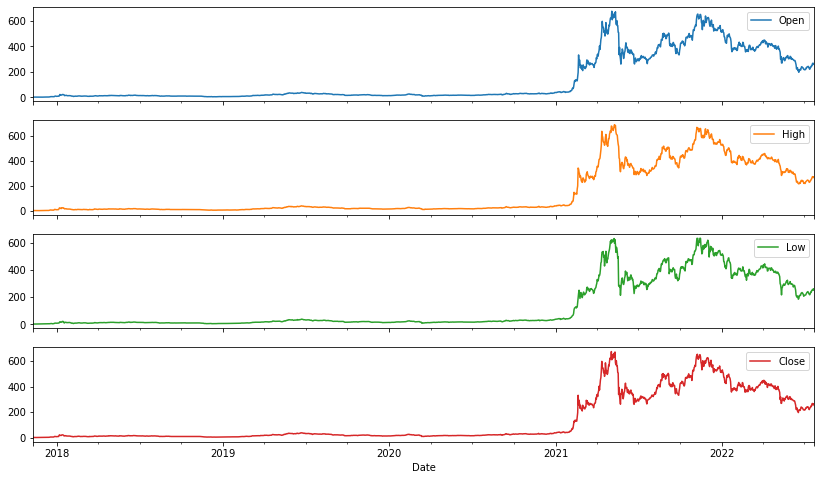

In [ ]:
# Plotting the graph of each column 

D.plot(subplots=True,figsize=(14,8))

In [ ]:
fig = px.line(df,x='Date',y='Open',title='Cryptocurrency Opened Price Visualization')
fig.update_xaxes(rangeslider_visible=True,
                rangeselector=dict(
                buttons=list([
                    dict(count=1,label='1y',step='year',stepmode='backward'),
                    dict(count=2,label='2y',step='year',stepmode='backward'),
                    dict(count=3,label='5y',step='year',stepmode='backward'),
                    dict(step='all')
                ])))
fig.show()

In [ ]:
fig = px.line(df,x='Date',y='High',title='Cryptocurrency High Price Visualization')
fig.update_xaxes(rangeslider_visible=True,
                rangeselector=dict(
                buttons=list([
                    dict(count=1,label='1y',step='year',stepmode='backward'),
                    dict(count=2,label='2y',step='year',stepmode='backward'),
                    dict(count=3,label='5y',step='year',stepmode='backward'),
                    dict(step='all')
                ])))
fig.show()

In [ ]:
fig = px.line(df,x='Date',y='Low',title='Cryptocurrency Low Price Visualization')
fig.update_xaxes(rangeslider_visible=True,
                rangeselector=dict(
                buttons=list([
                    dict(count=1,label='1y',step='year',stepmode='backward'),
                    dict(count=2,label='2y',step='year',stepmode='backward'),
                    dict(count=3,label='5y',step='year',stepmode='backward'),
                    dict(step='all')
                ])))
fig.show()

In [ ]:
fig = px.line(df,x='Date',y='Close',title='Cryptocurrency Closed Price Visualization')
fig.update_xaxes(rangeslider_visible=True,
                rangeselector=dict(
                buttons=list([
                    dict(count=1,label='1y',step='year',stepmode='backward'),
                    dict(count=2,label='2y',step='year',stepmode='backward'),
                    dict(count=3,label='5y',step='year',stepmode='backward'),
                    dict(step='all')
                ])))
fig.show()

# Moving Average

## Moving Average of Open column

In [ ]:
df_new = df[-7:]

In [ ]:
a = df_new['Open'].rolling(3)

In [ ]:
ma = a.mean()

In [ ]:
ma = ma.dropna()

In [ ]:
ma

2866    23034.645833
2867    22778.748698
2868    22593.216797
2869    22144.595703
2870    21731.790365
Name: Open, dtype: float64

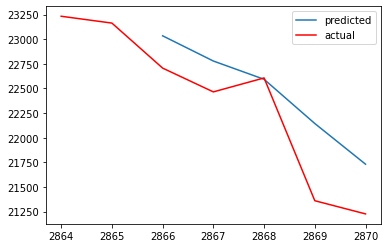

In [ ]:
# plotting the line plot for moving average

plt.plot(ma, label = 'predicted')
plt.plot(df_new['Open'], 'red', label = 'actual')
plt.legend()

In [ ]:
ma = ['Na']
window = 2

for i in range(len(df_new)-(window-1)):
    Ft = df_new['Open'][i:i+window]
    print(Ft)
    m_a = Ft.sum()/window
    ma.append(m_a)

2864    23233.201172
2865    23163.751953
Name: Open, dtype: float64
2865    23163.751953
2866    22706.984375
Name: Open, dtype: float64
2866    22706.984375
2867    22465.509766
Name: Open, dtype: float64
2867    22465.509766
2868    22607.156250
Name: Open, dtype: float64
2868    22607.156250
2869    21361.121094
Name: Open, dtype: float64
2869    21361.121094
2870    21227.093750
Name: Open, dtype: float64


In [ ]:
# predicting the next day cryptocurrency price 

seventh_day_prediction = ma[-window:]
prediction = pd.Series(seventh_day_prediction).sum()/window

In [ ]:
prediction

21639.123046875

## Moving Average of High column

In [ ]:
df_new = df[-7:]

In [ ]:
b = df_new['High'].rolling(3)

In [ ]:
ma = b.mean()

In [ ]:
ma = ma.dropna()

In [ ]:
ma

2866    23345.820312
2867    23207.713542
2868    22866.777995
2869    22328.081380
2870    21897.773438
Name: High, dtype: float64

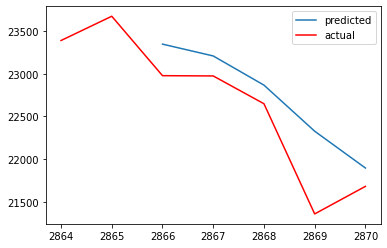

In [ ]:
# plotting the line plot for moving average

plt.plot(ma, label = 'predicted')
plt.plot(df_new['High'], 'red', label = 'actual')
plt.legend()

In [ ]:
ma = ['Na']
window = 2

for i in range(len(df_new)-(window-1)):
    Ft = df_new['High'][i:i+window]
    print(Ft)
    m_a = Ft.sum()/window
    ma.append(m_a)

2864    23388.322266
2865    23671.927734
Name: High, dtype: float64
2865    23671.927734
2866    22977.210938
Name: High, dtype: float64
2866    22977.210938
2867    22974.001953
Name: High, dtype: float64
2867    22974.001953
2868    22649.121094
Name: High, dtype: float64
2868    22649.121094
2869    21361.121094
Name: High, dtype: float64
2869    21361.121094
2870    21683.078125
Name: High, dtype: float64


In [ ]:
# predicting the next day cryptocurrency price 

seventh_day_prediction = ma[-window:]
prediction = pd.Series(seventh_day_prediction).sum()/window

In [ ]:
prediction

21763.6103515625

## Moving Average of Low column

In [ ]:
df_new = df[-7:]

In [ ]:
c = df_new['Low'].rolling(3)

In [ ]:
ma = c.mean()

In [ ]:
ma = ma.dropna()

In [ ]:
ma

Date
2022-07-23    22345.824870
2022-07-24    22304.388672
2022-07-25    21890.464193
2022-07-26    21481.766276
2022-07-27    21069.755208
Name: Low, dtype: float64

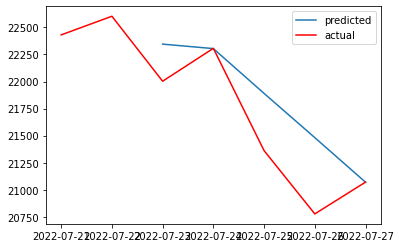

In [ ]:
# plotting the line plot for moving average

plt.plot(ma, label = 'predicted')
plt.plot(df_new['Low'], 'red', label = 'actual')
plt.legend()

In [ ]:
ma = ['Na']
window = 2

for i in range(len(df_new)-(window-1)):
    Ft = df_new['Low'][i:i+window]
    print(Ft)
    m_a = Ft.sum()/window
    ma.append(m_a)

Date
2022-07-21    22431.148438
2022-07-22    22603.416016
Name: Low, dtype: float64
Date
2022-07-22    22603.416016
2022-07-23    22002.910156
Name: Low, dtype: float64
Date
2022-07-23    22002.910156
2022-07-24    22306.839844
Name: Low, dtype: float64
Date
2022-07-24    22306.839844
2022-07-25    21361.642578
Name: Low, dtype: float64
Date
2022-07-25    21361.642578
2022-07-26    20776.816406
Name: Low, dtype: float64
Date
2022-07-26    20776.816406
2022-07-27    21070.806641
Name: Low, dtype: float64


In [ ]:
# predicting the next day cryptocurrency price 

seventh_day_prediction = ma[-window:]
prediction = pd.Series(seventh_day_prediction).sum()/window

In [ ]:
prediction

20996.5205078125

## Moving Average of Close column

In [ ]:
df_new = df[-7:]

In [ ]:
d = df_new['Close'].rolling(3)

In [ ]:
ma = d.mean()

In [ ]:
ma = ma.dropna()

In [ ]:
ma

2866    22781.695312
2867    22596.540365
2868    22145.447917
2869    21736.873047
2870    21417.282552
Name: Close, dtype: float64

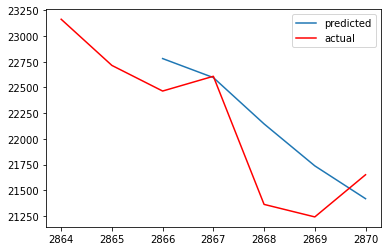

In [ ]:
# plotting the line plot for moving average

plt.plot(ma, label = 'predicted')
plt.plot(df_new['Close'], 'red', label = 'actual')
plt.legend()

In [ ]:
ma = ['Na']
window = 2

for i in range(len(df_new)-(window-1)):
    Ft = df_new['Close'][i:i+window]
    print(Ft)
    m_a = Ft.sum()/window
    ma.append(m_a)

2864    23164.628906
2865    22714.978516
Name: Close, dtype: float64
2865    22714.978516
2866    22465.478516
Name: Close, dtype: float64
2866    22465.478516
2867    22609.164062
Name: Close, dtype: float64
2867    22609.164062
2868    21361.701172
Name: Close, dtype: float64
2868    21361.701172
2869    21239.753906
Name: Close, dtype: float64
2869    21239.753906
2870    21650.392578
Name: Close, dtype: float64


In [ ]:
# predicting the next day cryptocurrency price 

seventh_day_prediction = ma[-window:]
prediction = pd.Series(seventh_day_prediction).sum()/window

In [ ]:
prediction

21372.900390625

# ARIMA Model

## Train Test Spliting

In [ ]:
S = D.shape[0]-3

train = D[0:S]
test = D[S:]

In [ ]:
test.shape

(3, 4)

## Model for Cryptocurrency Open Price

In [ ]:
model_Open = pm.auto_arima(D['Open'], m=12, seasonal=True,
                     start_P=0,
                      start_q=0,
                      max_order=3,
                      test='adf', error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True,
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=46575.614, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=46582.054, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=46572.496, Time=1.00 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=46573.725, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=46580.284, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=46581.168, Time=0.12 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=46563.222, Time=3.29 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=46558.158, Time=6.38 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=46558.636, Time=2.83 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=19.23 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=46558.017, Time=8.11 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=46565.359, Time=3.70 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=46573.681, Time=1.00 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=46557.594, Time=6.58 sec
 ARIMA(0,1

In [ ]:
print(model_Open.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                 2871
Model:             SARIMAX(0, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood              -23273.815
Date:                                 Wed, 27 Jul 2022   AIC                          46555.630
Time:                                         16:57:34   BIC                          46579.479
Sample:                                              0   HQIC                         46564.228
                                                - 2871                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6325      0.074     -8.516      0.000      -0.778      -0

In [ ]:
model_Open.fit(train["Open"])

pred_Open = model_Open.predict(n_periods=3, return_conf_int=True)
pred_Open

(array([22561.40990836, 22427.24320261, 22399.08190825]),
 array([[20966.49115188, 24156.32866483],
        [20171.68746632, 24682.7989389 ],
        [19636.60158809, 25161.56222841]]))

In [ ]:
Actual_Open = test['Open']
Actual_Open

Date
2022-07-25    22607.156250
2022-07-26    21361.121094
2022-07-27    21227.093750
Name: Open, dtype: float64

In [ ]:
Forecast_Open = pd.DataFrame(pred_Open[0],index=test.index,columns=['Prediction'])
DF_Open = pd.concat([Actual_Open,Forecast_Open],axis=1)
DF_Open

,Open,Prediction
Date,,
2022-07-25,22607.156250,22561.409908
2022-07-26,21361.121094,22427.243203
2022-07-27,21227.093750,22399.081908


In [ ]:
rmse = np.sqrt(mean_squared_error(DF_Open['Open'], DF_Open['Prediction'])).round(2)
mape = np.round(np.mean(np.abs(DF_Open['Open']-DF_Open['Prediction'])/DF_Open['Open'])*100,2)

results = pd.DataFrame({'Method':['ARIMA for "Open" column'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,"ARIMA for ""Open"" column",915.11,3.57


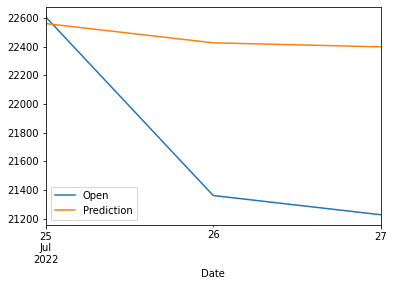

In [ ]:
DF_Open.plot()

In [ ]:
model_Open.predict(n_periods=6, return_conf_int=True)

(array([22561.40990836, 22427.24320261, 22399.08190825, 22366.34146904,
        22422.97485298, 22359.97941849]),
 array([[20966.49115188, 24156.32866483],
        [20171.68746632, 24682.7989389 ],
        [19636.60158809, 25161.56222841],
        [19176.50395609, 25556.17898199],
        [18856.62809491, 25989.32161105],
        [18453.24228393, 26266.71655305]]))

## Model for Cryptocurrency High Price

In [ ]:
model_High = pm.auto_arima(D['High'], m=12, seasonal=True,
                     start_P=0,
                      start_q=0,
                      max_order=3,
                      test='adf', error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True,
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=45715.719, Time=2.13 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=45755.605, Time=0.13 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=45713.770, Time=1.82 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=45715.136, Time=2.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=45753.925, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=45711.828, Time=0.22 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=45713.774, Time=1.58 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=45715.762, Time=1.84 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=45713.779, Time=0.69 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=45713.791, Time=0.61 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=45713.170, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=45706.743, Time=4.20 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=45708.071, Time=15.36 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=45708.125, Time=10.11 sec
 AR

In [ ]:
print(model_High.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                 2871
Model:             SARIMAX(4, 1, 0)x(2, 0, [1, 2], 12)   Log Likelihood              -22832.864
Date:                                 Wed, 27 Jul 2022   AIC                          45683.728
Time:                                         17:10:46   BIC                          45737.386
Sample:                                              0   HQIC                         45703.072
                                                - 2871                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1304      0.009     13.819      0.000       0.112       0

In [ ]:
model_High.fit(train["High"])

pred_High = model_High.predict(n_periods=3, return_conf_int=True)
pred_High

(array([22942.01536295, 22838.59285472, 22781.95856302]),
 array([[21583.46466573, 24300.56606017],
        [20788.10288261, 24889.08282683],
        [20201.32689054, 25362.59023551]]))

In [ ]:
Actual_High = test['High']
Actual_High

Date
2022-07-25    22649.121094
2022-07-26    21361.121094
2022-07-27    21683.078125
Name: High, dtype: float64

In [ ]:
Forecast_High = pd.DataFrame(pred_High[0],index=test.index,columns=['Prediction'])
DF_High = pd.concat([Actual_High,Forecast_High],axis=1)
DF_High

,High,Prediction
Date,,
2022-07-25,22649.121094,22942.015363
2022-07-26,21361.121094,22838.592855
2022-07-27,21683.078125,22781.958563


In [ ]:
rmse = np.sqrt(mean_squared_error(DF_High['High'], DF_High['Prediction'])).round(2)
mape = np.round(np.mean(np.abs(DF_High['High']-DF_High['Prediction'])/DF_High['High'])*100,2)

tempResults = pd.DataFrame({'Method':['ARIMA for "High" column'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,"ARIMA for ""Open"" column",915.11,3.57
0,"ARIMA for ""High"" column",1076.45,4.43


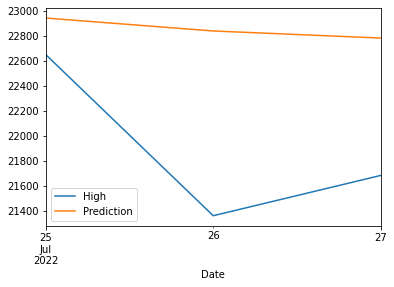

In [ ]:
DF_High.plot()

In [ ]:
model_High.predict(n_periods=6, return_conf_int=True)

(array([22942.01536295, 22838.59285472, 22781.95856302, 22857.17305477,
        22759.15011413, 22695.78745603]),
 array([[21583.46466573, 24300.56606017],
        [20788.10288261, 24889.08282683],
        [20201.32689054, 25362.59023551],
        [19856.88055998, 25857.46554955],
        [19347.62615395, 26170.67407431],
        [18906.92321915, 26484.65169291]]))

## Model for Cryptocurrency Low Price

In [ ]:
model_Low = pm.auto_arima(D['Low'], m=12, seasonal=True,
                     start_P=0,
                      start_q=0,
                      max_order=3,
                      test='adf', error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True,
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=46733.112, Time=1.27 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=46729.771, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=46731.865, Time=0.86 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=46732.058, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=46727.986, Time=0.06 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=46729.916, Time=0.71 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=46730.106, Time=0.71 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=46718.864, Time=2.49 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=46713.891, Time=7.72 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=46722.263, Time=2.46 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=46703.568, Time=18.14 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=46713.109, Time=7.20 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=46705.559, Time=20.18 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=46705.597, Time=20.28 sec
 A

In [ ]:
print(model_Low.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                 2871
Model:             SARIMAX(0, 1, 0)x(2, 0, [1, 2], 12)   Log Likelihood              -23346.517
Date:                                 Wed, 27 Jul 2022   AIC                          46703.034
Time:                                         17:14:01   BIC                          46732.844
Sample:                                              0   HQIC                         46713.781
                                                - 2871                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -1.2421      0.090    -13.839      0.000      -1.418      -1

In [ ]:
model_Low.fit(train["Low"])

pred_Low = model_Low.predict(n_periods=3, return_conf_int=True)
pred_Low

(array([22281.54934888, 22167.03043189, 22128.75822904]),
 array([[20664.1990186 , 23898.89967915],
        [19879.75165971, 24454.30920408],
        [19327.42528337, 24930.09117471]]))

In [ ]:
Actual_Low = test['Low']
Actual_Low

Date
2022-07-25    21361.642578
2022-07-26    20776.816406
2022-07-27    21070.806641
Name: Low, dtype: float64

In [ ]:
Forecast_Low = pd.DataFrame(pred_Low[0],index=test.index,columns=['Prediction'])
DF_Low = pd.concat([Actual_Low,Forecast_Low],axis=1)
DF_Low

,Low,Prediction
Date,,
2022-07-25,21361.642578,22281.549349
2022-07-26,20776.816406,22167.030432
2022-07-27,21070.806641,22128.758229


In [ ]:
rmse = np.sqrt(mean_squared_error(DF_Low['Low'], DF_Low['Prediction'])).round(2)
mape = np.round(np.mean(np.abs(DF_Low['Low']-DF_Low['Prediction'])/DF_Low['Low'])*100,2)

tempResults = pd.DataFrame({'Method':['ARIMA for "Low" column'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,"ARIMA for ""Open"" column",915.11,3.57
0,"ARIMA for ""High"" column",1076.45,4.43
0,"ARIMA for ""Low"" column",1139.91,5.34


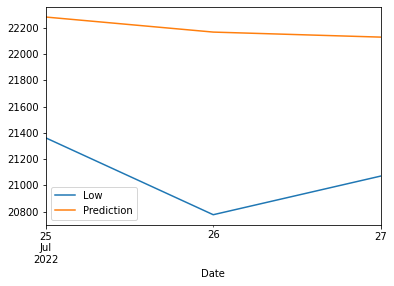

In [ ]:
DF_Low.plot()

In [ ]:
model_Low.predict(n_periods=6, return_conf_int=True)

(array([22281.54934888, 22167.03043189, 22128.75822904, 22036.85410493,
        21991.07968424, 21903.69415499]),
 array([[20664.1990186 , 23898.89967915],
        [19879.75165971, 24454.30920408],
        [19327.42528337, 24930.09117471],
        [18802.15344439, 25271.55476548],
        [18374.57440232, 25607.58496617],
        [17942.0111105 , 25865.37719948]]))

## Model for Cryptocurrency Close Price

In [ ]:
model_Close = pm.auto_arima(D['Close'], m=12, seasonal=True,
                     start_P=0,
                      start_q=0,
                      max_order=3,
                      test='adf', error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True,
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=46551.000, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=46558.093, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=46547.660, Time=0.98 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=46549.142, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=46556.334, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=46558.143, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=46537.147, Time=3.59 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=46529.857, Time=11.78 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=46530.708, Time=4.84 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=30.71 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=46529.632, Time=10.08 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=46539.900, Time=2.86 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=46549.104, Time=2.05 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=46528.438, Time=7.46 sec
 ARIMA(0

In [ ]:
print(model_Close.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 2871
Model:             SARIMAX(0, 1, 0)x(2, 0, [1], 12)   Log Likelihood              -23259.364
Date:                              Wed, 27 Jul 2022   AIC                          46526.728
Time:                                      17:16:59   BIC                          46550.576
Sample:                                           0   HQIC                         46535.325
                                             - 2871                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5956      0.080     -7.413      0.000      -0.753      -0.438
ar.S.L24       0.03

In [ ]:
model_Close.fit(train["Close"])

pred_Close = model_Close.predict(n_periods=3, return_conf_int=True)
pred_Close

(array([22470.28696373, 22441.19373586, 22406.28515953]),
 array([[20896.00292472, 24044.57100273],
        [20214.81989687, 24667.56757485],
        [19679.54521843, 25133.02510064]]))

In [ ]:
Actual_Close = test['Close']
Actual_Close

Date
2022-07-25    21361.701172
2022-07-26    21239.753906
2022-07-27    21650.392578
Name: Close, dtype: float64

In [ ]:
Forecast_Open = pd.DataFrame(pred_Open[0],index=test.index,columns=['Prediction'])
DF_Close = pd.concat([Actual_Open,Forecast_Open],axis=1)
DF_Close

,Open,Prediction
Date,,
2022-07-25,22607.156250,22561.409908
2022-07-26,21361.121094,22427.243203
2022-07-27,21227.093750,22399.081908


In [ ]:
rmse = np.sqrt(mean_squared_error(DF_Close['Open'], DF_Close['Prediction'])).round(2)
mape = np.round(np.mean(np.abs(DF_Close['Open']-DF_Close['Prediction'])/DF_Close['Open'])*100,2)

tempResults = pd.DataFrame({'Method':['ARIMA for "Close" column'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,"ARIMA for ""Open"" column",915.11,3.57
0,"ARIMA for ""High"" column",1076.45,4.43
0,"ARIMA for ""Low"" column",1139.91,5.34
0,"ARIMA for ""Close"" column",915.11,3.57


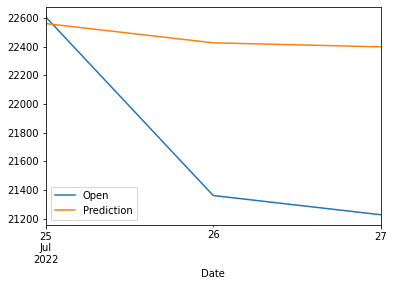

In [ ]:
DF_Close.plot()

In [ ]:
model_Close.predict(n_periods=6, return_conf_int=True)

(array([22470.28696373, 22441.19373586, 22406.28515953, 22465.49887008,
        22394.92874044, 22296.63522427]),
 array([[20896.00292472, 24044.57100273],
        [20214.81989687, 24667.56757485],
        [19679.54521843, 25133.02510064],
        [19316.93079207, 25614.06694809],
        [18874.72261333, 25915.13486755],
        [18440.4426185 , 26152.82783004]]))

# LSTM

## LSTM Model for 'Open' column

In [ ]:
coin = yf.Ticker(currency)
df = coin.history('max')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2871 entries, 2014-09-17 to 2022-07-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2871 non-null   float64
 1   High          2871 non-null   float64
 2   Low           2871 non-null   float64
 3   Close         2871 non-null   float64
 4   Volume        2871 non-null   int64  
 5   Dividends     2871 non-null   int64  
 6   Stock Splits  2871 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 179.4 KB


In [ ]:
def prepare_data(data,n_step):
    x,y=[],[]
    for i in range(len(data)):
        end_ix = i + n_step
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [ ]:
df.shape

(2871, 7)

In [ ]:
size=0.90
k=int(size*df.shape[0])
print(k)

2583


In [ ]:
train_data=df["Open"][np.arange(0,k)]
test_data=df["Open"][np.arange(k,df.shape[0])]

In [ ]:
k=df.shape[0]-14
train_data=df["Open"][np.arange(0,k)]
test_data=df["Open"][np.arange(k,df.shape[0])]

In [ ]:
n_step =7
x_train,y_train = prepare_data(train_data, n_step)
x_test,y_test = prepare_data(test_data, n_step)

In [ ]:
print(x_train)

[[  465.86401367   456.85998535   424.10299683 ...   408.08499146
    399.1000061    402.0920105 ]
 [  456.85998535   424.10299683   394.67300415 ...   399.1000061
    402.0920105    435.75100708]
 [  424.10299683   394.67300415   408.08499146 ...   402.0920105
    435.75100708   423.15600586]
 ...
 [19297.31445312 20225.35351562 20194.61914062 ... 21637.15429688
  21716.828125   21591.08007812]
 [20225.35351562 20194.61914062 20547.81445312 ... 21716.828125
  21591.08007812 20856.35351562]
 [20194.61914062 20547.81445312 21637.15429688 ... 21591.08007812
  20856.35351562 19970.47460938]]


In [ ]:
n_features = 1
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], n_features))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], n_features))

Building LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape = (n_step, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mse')
# fit model
model.fit(x_train,y_train, epochs = 100, verbose =1)

Epoch 1/500
90/90 [==============================] - 4s 10ms/step - loss: 154691632.0000
Epoch 2/500
90/90 [==============================] - 1s 10ms/step - loss: 9329207.0000
Epoch 3/500
90/90 [==============================] - 1s 10ms/step - loss: 3726218.2500
Epoch 4/500
90/90 [==============================] - 1s 10ms/step - loss: 2603669.0000
Epoch 5/500
90/90 [==============================] - 1s 10ms/step - loss: 2701910.5000
Epoch 6/500
90/90 [==============================] - 3s 31ms/step - loss: 3176444.0000
Epoch 7/500
90/90 [==============================] - 1s 14ms/step - loss: 2480527.2500
Epoch 8/500
90/90 [==============================] - 1s 9ms/step - loss: 2841982.7500
Epoch 9/500
90/90 [==============================] - 1s 9ms/step - loss: 2975340.7500
Epoch 10/500
90/90 [==============================] - 1s 10ms/step - loss: 2842338.5000
Epoch 11/500
90/90 [==============================] - 1s 10ms/step - loss: 2479823.7500
Epoch 12/500
90/90 [=====================

In [ ]:
next_days=7
x_input =np.array(test_data[0:n_step])
temp_input = list(x_input)
lst_output = []
i=0
while(i<next_days):
    if(len(temp_input)>n_step):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape((1, n_step, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_step, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
        
print(lst_output)

[23422.365]
1 day input [20573.15625    20834.10351562 21195.04101562 20781.91210938
 22467.84960938 23393.19140625 23422.36523438]
1 day output [[23716.992]]
2 day input [20834.10351562 21195.04101562 20781.91210938 22467.84960938
 23393.19140625 23422.36523438 23716.9921875 ]
2 day output [[23776.662]]
3 day input [21195.04101562 20781.91210938 22467.84960938 23393.19140625
 23422.36523438 23716.9921875  23776.66210938]
3 day output [[23928.707]]
4 day input [20781.91210938 22467.84960938 23393.19140625 23422.36523438
 23716.9921875  23776.66210938 23928.70703125]
4 day output [[24036.73]]
5 day input [22467.84960938 23393.19140625 23422.36523438 23716.9921875
 23776.66210938 23928.70703125 24036.73046875]
5 day output [[24233.756]]
6 day input [23393.19140625 23422.36523438 23716.9921875  23776.66210938
 23928.70703125 24036.73046875 24233.75585938]
6 day output [[24422.316]]
[23422.365, 23716.992, 23776.662, 23928.707, 24036.73, 24233.756, 24422.316]


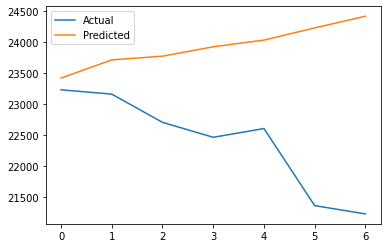

In [ ]:
# plot lines
plt.plot(np.array(y_test), label = "Actual")
plt.plot(lst_output, label = "Predicted")
plt.legend()
plt.show()

## LSTM Model for 'High' column

In [ ]:
coin = yf.Ticker(currency)
df = coin.history('max')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2871 entries, 2014-09-17 to 2022-07-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2871 non-null   float64
 1   High          2871 non-null   float64
 2   Low           2871 non-null   float64
 3   Close         2871 non-null   float64
 4   Volume        2871 non-null   int64  
 5   Dividends     2871 non-null   int64  
 6   Stock Splits  2871 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 179.4 KB


In [ ]:
def prepare_data(data,n_step):
    x,y=[],[]
    for i in range(len(data)):
        end_ix = i + n_step
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [ ]:
df.shape

(2871, 7)

In [ ]:
size=0.90
k=int(size*df.shape[0])
print(k)

2583


In [ ]:
train_data=df["High"][np.arange(0,k)]
test_data=df["High"][np.arange(k,df.shape[0])]

In [ ]:
k=df.shape[0]-14
train_data=df["High"][np.arange(0,k)]
test_data=df["High"][np.arange(k,df.shape[0])]

In [ ]:
n_step =7
x_train,y_train = prepare_data(train_data, n_step)
x_test,y_test = prepare_data(test_data, n_step)

In [ ]:
print(x_train)

[[  468.17401123   456.85998535   427.83499146 ...   412.42599487
    406.91598511   441.55700684]
 [  456.85998535   427.83499146   423.29598999 ...   406.91598511
    441.55700684   436.11199951]
 [  427.83499146   423.29598999   412.42599487 ...   441.55700684
    436.11199951   423.51998901]
 ...
 [20258.74804688 20635.46679688 20595.52929688 ... 22314.94140625
  21877.13867188 21591.08007812]
 [20635.46679688 20595.52929688 21771.81640625 ... 21877.13867188
  21591.08007812 20856.35351562]
 [20595.52929688 21771.81640625 22314.94140625 ... 21591.08007812
  20856.35351562 20043.4453125 ]]


In [ ]:
n_features = 1
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], n_features))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], n_features))

### Building LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape = (n_step, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mse')
# fit model
model.fit(x_train,y_train, epochs = 100, verbose =1)

Epoch 1/100
90/90 [==============================] - 4s 10ms/step - loss: 54514908.0000
Epoch 2/100
90/90 [==============================] - 1s 10ms/step - loss: 2951387.5000
Epoch 3/100
90/90 [==============================] - 1s 10ms/step - loss: 3300559.2500
Epoch 4/100
90/90 [==============================] - 1s 10ms/step - loss: 3345045.7500
Epoch 5/100
90/90 [==============================] - 1s 10ms/step - loss: 3108995.5000
Epoch 6/100
90/90 [==============================] - 1s 10ms/step - loss: 2485314.7500
Epoch 7/100
90/90 [==============================] - 1s 10ms/step - loss: 2261573.7500
Epoch 8/100
90/90 [==============================] - 1s 10ms/step - loss: 2242031.7500
Epoch 9/100
90/90 [==============================] - 1s 10ms/step - loss: 2398443.7500
Epoch 10/100
90/90 [==============================] - 1s 10ms/step - loss: 2238359.0000
Epoch 11/100
90/90 [==============================] - 1s 9ms/step - loss: 2093662.6250
Epoch 12/100
90/90 [=====================

In [ ]:
next_days=7
x_input =np.array(test_data[0:n_step])
temp_input = list(x_input)
lst_output = []
i=0
while(i<next_days):
    if(len(temp_input)>n_step):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape((1, n_step, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_step, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
        
print(lst_output)

[23526.229]
1 day input [21138.24414062 21514.40429688 21600.640625   22633.03320312
 23666.96289062 24196.81835938 23526.22851562]
1 day output [[22985.451]]
2 day input [21514.40429688 21600.640625   22633.03320312 23666.96289062
 24196.81835938 23526.22851562 22985.45117188]
2 day output [[22263.312]]
3 day input [21600.640625   22633.03320312 23666.96289062 24196.81835938
 23526.22851562 22985.45117188 22263.3125    ]
3 day output [[21559.37]]
4 day input [22633.03320312 23666.96289062 24196.81835938 23526.22851562
 22985.45117188 22263.3125     21559.36914062]
4 day output [[20835.11]]
5 day input [23666.96289062 24196.81835938 23526.22851562 22985.45117188
 22263.3125     21559.36914062 20835.109375  ]
5 day output [[20256.824]]
6 day input [24196.81835938 23526.22851562 22985.45117188 22263.3125
 21559.36914062 20835.109375   20256.82421875]
6 day output [[19676.4]]
[23526.229, 22985.451, 22263.312, 21559.37, 20835.11, 20256.824, 19676.4]


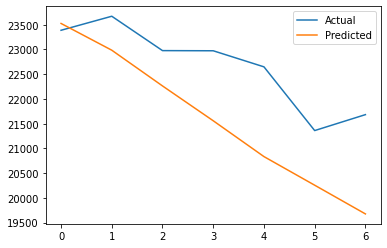

In [ ]:
# plot lines
plt.plot(np.array(y_test), label = "Actual")
plt.plot(lst_output, label = "Predicted")
plt.legend()
plt.show()

## LSTM Model for 'Low' column

In [ ]:
coin = yf.Ticker(currency)
df = coin.history('max')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2871 entries, 2014-09-17 to 2022-07-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2871 non-null   float64
 1   High          2871 non-null   float64
 2   Low           2871 non-null   float64
 3   Close         2871 non-null   float64
 4   Volume        2871 non-null   int64  
 5   Dividends     2871 non-null   int64  
 6   Stock Splits  2871 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 179.4 KB


In [ ]:
def prepare_data(data,n_step):
    x,y=[],[]
    for i in range(len(data)):
        end_ix = i + n_step
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [ ]:
df.shape

(2871, 7)

In [ ]:
size=0.90
k=int(size*df.shape[0])
print(k)

2583


In [ ]:
train_data=df["Low"][np.arange(0,k)]
test_data=df["Low"][np.arange(k,df.shape[0])]

In [ ]:
k=df.shape[0]-14
train_data=df["Low"][np.arange(0,k)]
test_data=df["Low"][np.arange(k,df.shape[0])]

In [ ]:
n_step =7
x_train,y_train = prepare_data(train_data, n_step)
x_test,y_test = prepare_data(test_data, n_step)

In [ ]:
print(x_train)

[[  452.42199707   413.10400391   384.53201294 ...   393.18099976
    397.13000488   396.19699097]
 [  413.10400391   384.53201294   389.88299561 ...   397.13000488
    396.19699097   421.13198853]
 [  384.53201294   389.88299561   393.18099976 ...   396.19699097
    421.13198853   409.46798706]
 ...
 [19063.06640625 19341.23242188 19823.51171875 ... 21257.453125
  21445.95703125 20727.12304688]
 [19341.23242188 19823.51171875 20296.10351562 ... 21445.95703125
  20727.12304688 19924.5390625 ]
 [19823.51171875 20296.10351562 21257.453125   ... 20727.12304688
  19924.5390625  19308.53125   ]]


In [ ]:
n_features = 1
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], n_features))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], n_features))

### Building LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape = (n_step, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mse')
# fit model
model.fit(x_train,y_train, epochs = 100, verbose =1)

Epoch 1/100
90/90 [==============================] - 3s 10ms/step - loss: 172144784.0000
Epoch 2/100
90/90 [==============================] - 1s 10ms/step - loss: 3808466.5000
Epoch 3/100
90/90 [==============================] - 1s 10ms/step - loss: 9829156.0000
Epoch 4/100
90/90 [==============================] - 1s 10ms/step - loss: 4965051.0000
Epoch 5/100
90/90 [==============================] - 1s 10ms/step - loss: 3387240.5000
Epoch 6/100
90/90 [==============================] - 1s 10ms/step - loss: 3286678.5000
Epoch 7/100
90/90 [==============================] - 1s 10ms/step - loss: 2493126.5000
Epoch 8/100
90/90 [==============================] - 1s 9ms/step - loss: 2396437.0000
Epoch 9/100
90/90 [==============================] - 1s 10ms/step - loss: 2176317.2500
Epoch 10/100
90/90 [==============================] - 1s 9ms/step - loss: 2903549.5000
Epoch 11/100
90/90 [==============================] - 1s 10ms/step - loss: 2216742.5000
Epoch 12/100
90/90 [=====================

In [ ]:
next_days=7
x_input =np.array(test_data[0:n_step])
temp_input = list(x_input)
lst_output = []
i=0
while(i<next_days):
    if(len(temp_input)>n_step):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape((1, n_step, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_step, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
        
print(lst_output)

[23048.318]
1 day input [20397.         20518.8984375  20778.1796875  20781.91210938
 21683.40625    23009.94921875 23048.31835938]
1 day output [[23624.12]]
2 day input [20518.8984375  20778.1796875  20781.91210938 21683.40625
 23009.94921875 23048.31835938 23624.11914062]
2 day output [[24135.213]]
3 day input [20778.1796875  20781.91210938 21683.40625    23009.94921875
 23048.31835938 23624.11914062 24135.21289062]
3 day output [[24668.502]]
4 day input [20781.91210938 21683.40625    23009.94921875 23048.31835938
 23624.11914062 24135.21289062 24668.50195312]
4 day output [[25190.469]]
5 day input [21683.40625    23009.94921875 23048.31835938 23624.11914062
 24135.21289062 24668.50195312 25190.46875   ]
5 day output [[25748.914]]
6 day input [23009.94921875 23048.31835938 23624.11914062 24135.21289062
 24668.50195312 25190.46875    25748.9140625 ]
6 day output [[26320.988]]
[23048.318, 23624.12, 24135.213, 24668.502, 25190.469, 25748.914, 26320.988]


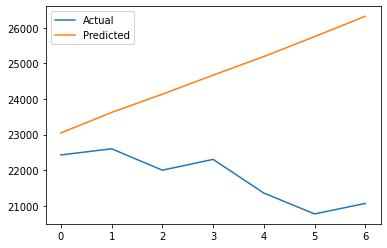

In [ ]:
# plot lines
plt.plot(np.array(y_test), label = "Actual")
plt.plot(lst_output, label = "Predicted")
plt.legend()
plt.show()

## LSTM Model for 'Close' column

In [ ]:
coin = yf.Ticker(currency)
df = coin.history('max')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2871 entries, 2014-09-17 to 2022-07-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2871 non-null   float64
 1   High          2871 non-null   float64
 2   Low           2871 non-null   float64
 3   Close         2871 non-null   float64
 4   Volume        2871 non-null   int64  
 5   Dividends     2871 non-null   int64  
 6   Stock Splits  2871 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 179.4 KB


In [ ]:
def prepare_data(data,n_step):
    x,y=[],[]
    for i in range(len(data)):
        end_ix = i + n_step
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [ ]:
df.shape

(2871, 7)

In [ ]:
size=0.90
k=int(size*df.shape[0])
print(k)

2583


In [ ]:
train_data=df["Close"][np.arange(0,k)]
test_data=df["Close"][np.arange(k,df.shape[0])]

In [ ]:
k=df.shape[0]-14
train_data=df["Close"][np.arange(0,k)]
test_data=df["Close"][np.arange(k,df.shape[0])]

In [ ]:
n_step =7
x_train,y_train = prepare_data(train_data, n_step)
x_test,y_test = prepare_data(test_data, n_step)

In [ ]:
print(x_train)

[[  457.33401489   424.44000244   394.79598999 ...   398.8210144
    402.15200806   435.79098511]
 [  424.44000244   394.79598999   408.9039917  ...   402.15200806
    435.79098511   423.20498657]
 [  394.79598999   408.9039917    398.8210144  ...   435.79098511
    423.20498657   411.57400513]
 ...
 [20231.26171875 20190.11523438 20548.24609375 ... 21731.1171875
  21592.20703125 20860.44921875]
 [20190.11523438 20548.24609375 21637.58789062 ... 21592.20703125
  20860.44921875 19970.55664062]
 [20548.24609375 21637.58789062 21731.1171875  ... 20860.44921875
  19970.55664062 19323.9140625 ]]


In [ ]:
n_features = 1
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], n_features))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], n_features))

### Building LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape = (n_step, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mse')
# fit model
model.fit(x_train,y_train, epochs = 100, verbose =1)

Epoch 1/100
90/90 [==============================] - 3s 10ms/step - loss: 107196680.0000
Epoch 2/100
90/90 [==============================] - 1s 10ms/step - loss: 3949918.7500
Epoch 3/100
90/90 [==============================] - 1s 10ms/step - loss: 3283503.5000
Epoch 4/100
90/90 [==============================] - 1s 10ms/step - loss: 10690625.0000
Epoch 5/100
90/90 [==============================] - 1s 10ms/step - loss: 2424423.7500
Epoch 6/100
90/90 [==============================] - 2s 18ms/step - loss: 2327361.5000
Epoch 7/100
90/90 [==============================] - 2s 21ms/step - loss: 3055028.5000
Epoch 8/100
90/90 [==============================] - 2s 23ms/step - loss: 8509827.0000
Epoch 9/100
90/90 [==============================] - 2s 17ms/step - loss: 3120857.0000
Epoch 10/100
90/90 [==============================] - 1s 10ms/step - loss: 2729050.5000
Epoch 11/100
90/90 [==============================] - 1s 10ms/step - loss: 2903183.5000
Epoch 12/100
90/90 [==================

In [ ]:
next_days=7
x_input =np.array(test_data[0:n_step])
temp_input = list(x_input)
lst_output = []
i=0
while(i<next_days):
    if(len(temp_input)>n_step):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape((1, n_step, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_step, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
        
print(lst_output)

[23034.25]
1 day input [20836.328125   21190.31640625 20779.34375    22485.68945312
 23389.43359375 23231.73242188 23034.25      ]
1 day output [[22936.902]]
2 day input [21190.31640625 20779.34375    22485.68945312 23389.43359375
 23231.73242188 23034.25       22936.90234375]
2 day output [[22825.434]]
3 day input [20779.34375    22485.68945312 23389.43359375 23231.73242188
 23034.25       22936.90234375 22825.43359375]
3 day output [[22700.432]]
4 day input [22485.68945312 23389.43359375 23231.73242188 23034.25
 22936.90234375 22825.43359375 22700.43164062]
4 day output [[22495.277]]
5 day input [23389.43359375 23231.73242188 23034.25       22936.90234375
 22825.43359375 22700.43164062 22495.27734375]
5 day output [[22269.521]]
6 day input [23231.73242188 23034.25       22936.90234375 22825.43359375
 22700.43164062 22495.27734375 22269.52148438]
6 day output [[22055.92]]
[23034.25, 22936.902, 22825.434, 22700.432, 22495.277, 22269.521, 22055.92]


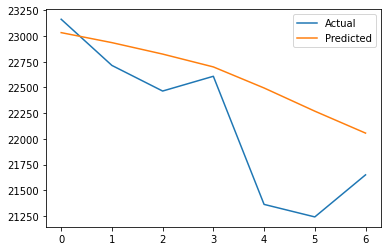

In [ ]:
# plot lines
plt.plot(np.array(y_test), label = "Actual")
plt.plot(lst_output, label = "Predicted")
plt.legend()
plt.show()